<a href="https://colab.research.google.com/github/ginzilhanan/Image-Classification/blob/main/Copy_of_Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Basic Image Classification

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)

2.15.0


In [3]:
#import the Fashion MNIST dataset

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images,test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirts/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
#Exploring the data
train_images.shape


(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

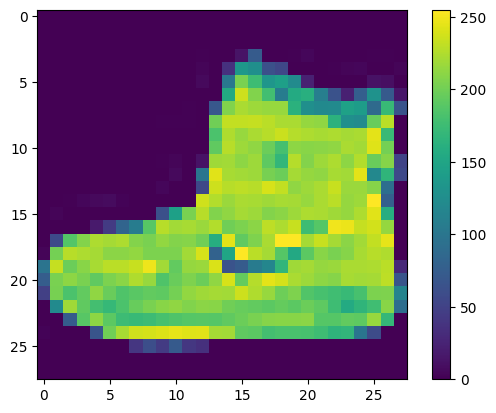

In [10]:
#Preprocess the data

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
#preprocessing

train_images = train_images / 255.0

test_images = test_images / 255.0

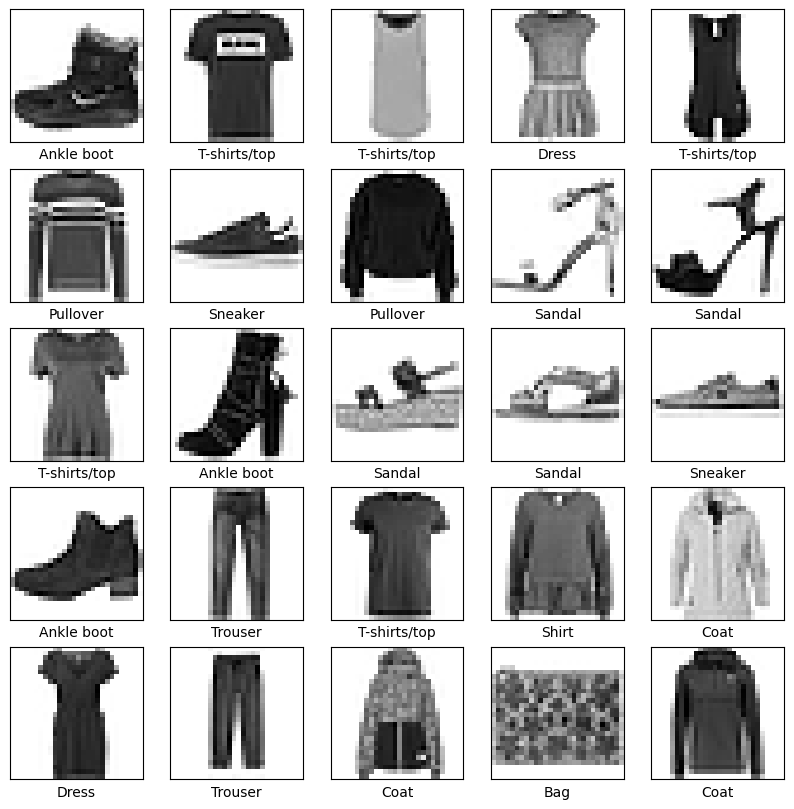

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:

#Building the Model

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5034 - accuracy: 0.8219
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3761 - accuracy: 0.8639
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3386 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3131 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2968 - accuracy: 0.8904
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2811 - accuracy: 0.8969
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2695 - accuracy: 0.8994
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2581 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2498 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.24

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3338 - accuracy: 0.8818 - 599ms/epoch - 2ms/step

Test accuracy: 0.8817999958992004


In [17]:
#Making predictio
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [18]:
predictions[0]

array([9.8123860e-07, 5.7363270e-11, 6.8214252e-09, 8.1960225e-09,
       1.1851498e-07, 6.8721327e-04, 5.2068372e-09, 1.1574051e-02,
       2.4874616e-08, 9.8773766e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [19]:
test_labels[0]

In [20]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

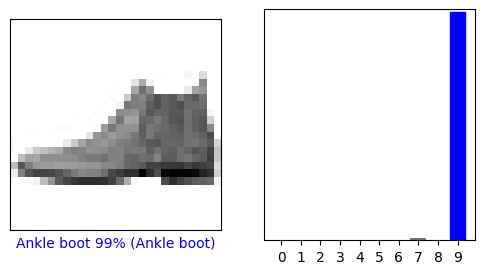

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

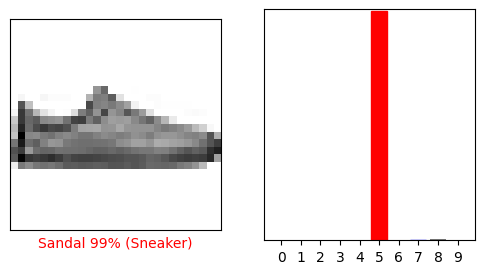

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

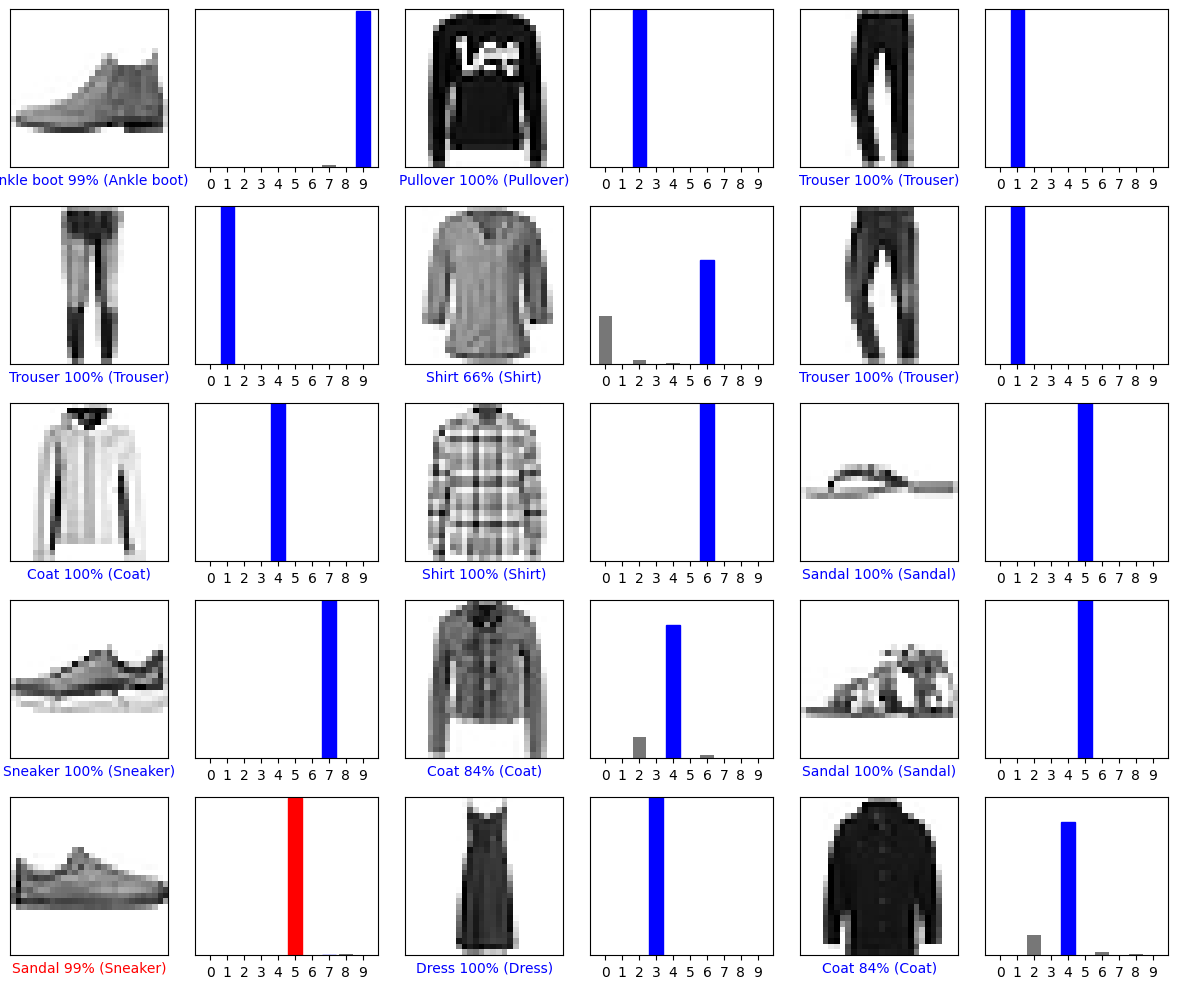

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()